In [1]:
from PIL import Image, ImageOps
import random

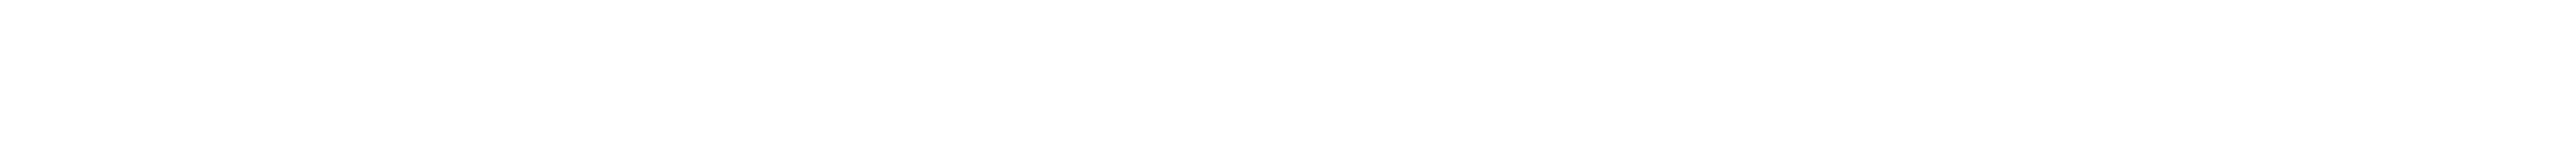

(255, 255, 255)


In [2]:
im = Image.new(mode="RGB", size=(16*400, 9*40), color=(255,255,255))

display(im)

matrix = im.load()
print(matrix)
print(matrix[0,1])

In [3]:
def random_rectangles(imagen, cantidad, lado_min, lado_max):
    matrix = imagen.load()
    x_max, y_max = imagen.size
    for _ in range(cantidad):
        x_ini, y_ini = random.randint(0,x_max-lado_max), random.randint(0,y_max-lado_max)
        x_lado, y_lado = random.randint(lado_min,lado_max), random.randint(lado_min,lado_max)
        color_usado = (random.randint(0,255),random.randint(0,255),random.randint(0,255))
        for coord_x in range(x_ini, x_ini + x_lado):
            for coord_y in range(y_ini, y_ini + y_lado):
                matrix[coord_x, coord_y] = color_usado

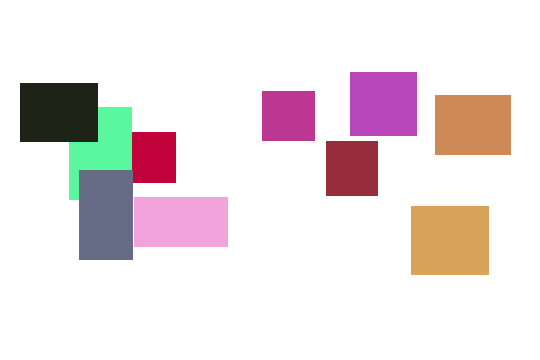

In [4]:
im = Image.new(mode="RGB", size=(1080//2, 720//2), color=(255,255,255))
random_rectangles(im, 10, 50, 100)
display(im)

In [5]:
def random_rectangles_2(imagen, cantidad, lado_min, lado_max, rango_colores):
    # rango_colores = ((min_r, max_r), (min_g, max_g), (min_b, max_b))
    matrix = imagen.load()
    x_max, y_max = imagen.size
    for _ in range(cantidad):
        x_ini, y_ini = random.randint(0,x_max-lado_max), random.randint(0,y_max-lado_max)
        x_lado, y_lado = random.randint(lado_min,lado_max), random.randint(lado_min,lado_max)
        color_usado = (random.randint(rango_colores[0][0],rango_colores[0][1]),
                       random.randint(rango_colores[1][0],rango_colores[1][1]),
                       random.randint(rango_colores[2][0],rango_colores[2][1]))
        for coord_x in range(x_ini, x_ini + x_lado):
            for coord_y in range(y_ini, y_ini + y_lado):
                matrix[coord_x, coord_y] = color_usado


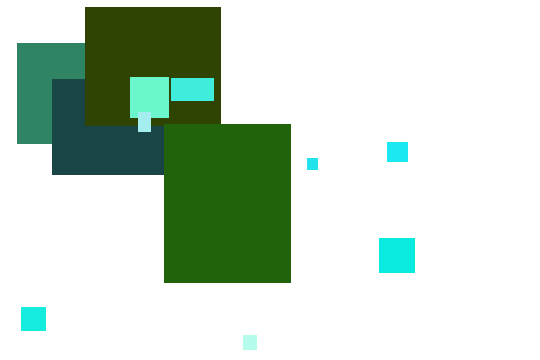

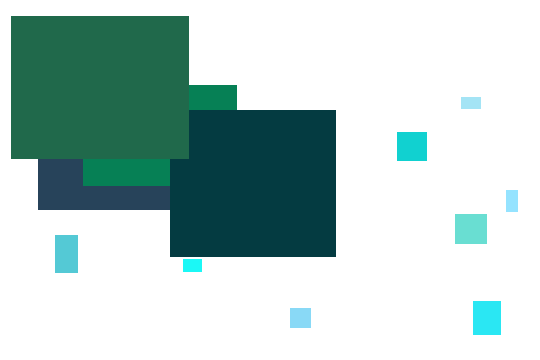

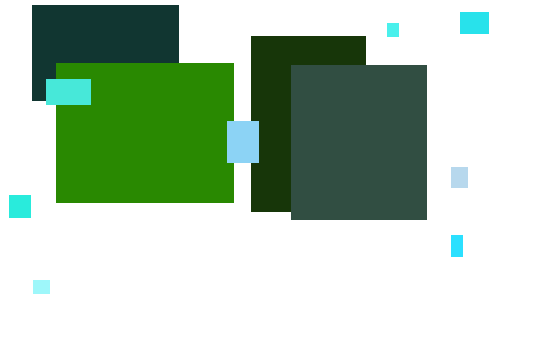

In [6]:
for i in range(3):
    im = Image.new(mode="RGB", size=(1080//2, 720//2), color=(255,255,255))
    random_rectangles_2(im, 4, 720//8, 720//4, ((0,50),(50,150),(0,100)))
    random_rectangles_2(im, 4, 720//32, 720//16, ((0,150),(200,255),(200,255)))
    random_rectangles_2(im, 4, 720//64, 720//32, ((0,200),(215,255),(230,255)))
    display(im)

In [7]:
# meterle bordes
# factor deformidad
# factor distancia
# cumulo (obligar a q esten seguidos)

In [8]:
def random_rectangles_2_trans(imagen, cantidad, lado_min, lado_max, rango_colores):
    # rango_colores = ((min_r, max_r), (min_g, max_g), (min_b, max_b))
    matrix = imagen.load()
    x_max, y_max = imagen.size
    for _ in range(cantidad):
        x_ini, y_ini = random.randint(0,x_max-lado_max), random.randint(0,y_max-lado_max)
        x_lado, y_lado = random.randint(lado_min,lado_max), random.randint(lado_min,lado_max)
        color_usado = (random.randint(rango_colores[0][0],rango_colores[0][1]),
                       random.randint(rango_colores[1][0],rango_colores[1][1]),
                       random.randint(rango_colores[2][0],rango_colores[2][1]))
        for coord_x in range(x_ini, x_ini + x_lado):
            for coord_y in range(y_ini, y_ini + y_lado):
                if matrix[coord_x, coord_y] == (255,255,255):
                    matrix[coord_x, coord_y] = color_usado
                else:
                    matrix[coord_x, coord_y] = (matrix[coord_x, coord_y][0]//2 + color_usado[0]//2,
                                                matrix[coord_x, coord_y][1]//2 + color_usado[1]//2,
                                                matrix[coord_x, coord_y][2]//2 + color_usado[2]//2,)

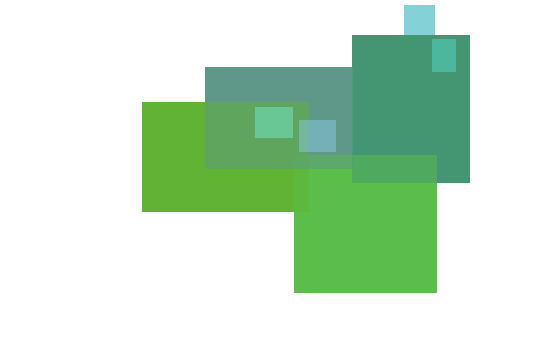

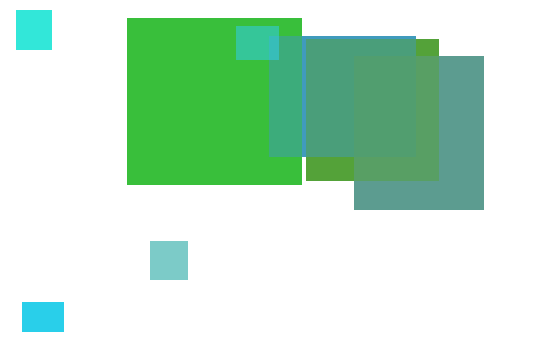

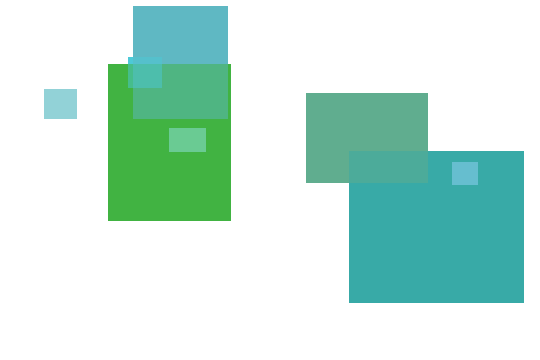

In [9]:
for i in range(3):
    im = Image.new(mode="RGB", size=(1080//2, 720//2), color=(255,255,255))
    random_rectangles_2_trans(im, 4, 720//8, 720//4, ((50,100),(150,200),(50,200)))
    random_rectangles_2_trans(im, 4, 720//32, 720//16, ((20,150),(200,255),(200,255)))
    # random_rectangles_2_trans(im, 4, 720//64, 720//32, ((0,200),(215,255),(230,255)))
    display(im)

In [10]:
def random_rectangles_trans_cumulo(imagen, cantidad, lado_min, lado_max, rango_colores, trans, cumulo):
    # rango_colores = ((min_r, max_r), (min_g, max_g), (min_b, max_b))
    matrix = imagen.load()
    x_max, y_max = imagen.size
    for iteracion in range(cantidad):
        x_ini, y_ini = random.randint(0,x_max-lado_max), random.randint(0,y_max-lado_max)
        x_lado, y_lado = random.randint(lado_min,lado_max), random.randint(lado_min,lado_max)
        tocando = False
        if iteracion == 0:
            tocando = True
        if not cumulo:
            tocando = True
        else:
            while not tocando:
                x_ini, y_ini = random.randint(0,x_max-lado_max), random.randint(0,y_max-lado_max)
                x_lado, y_lado = random.randint(lado_min,lado_max), random.randint(lado_min,lado_max)
                tocando = False
                for coord_x in range(x_ini, x_ini + x_lado):
                    for coord_y in range(y_ini, y_ini + y_lado):
                        if matrix[coord_x, coord_y] != (255,255,255):
                            tocando = True
                            break
                    break
            color_usado = (random.randint(rango_colores[0][0],rango_colores[0][1]),
            random.randint(rango_colores[1][0],rango_colores[1][1]),
            random.randint(rango_colores[2][0],rango_colores[2][1]))
            for coord_x in range(x_ini, x_ini + x_lado):
                for coord_y in range(y_ini, y_ini + y_lado):
                    if not trans:
                        matrix[coord_x, coord_y] = color_usado
                    else:
                        if matrix[coord_x, coord_y] == (255,255,255):
                            matrix[coord_x, coord_y] = color_usado
                        else:
                            matrix[coord_x, coord_y] = (matrix[coord_x, coord_y][0]//2 + color_usado[0]//2,
                                                        matrix[coord_x, coord_y][1]//2 + color_usado[1]//2,
                                                        matrix[coord_x, coord_y][2]//2 + color_usado[2]//2,)


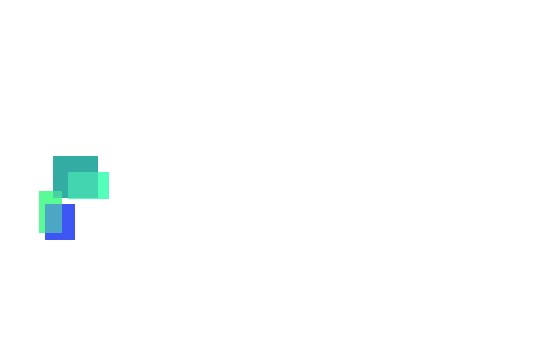

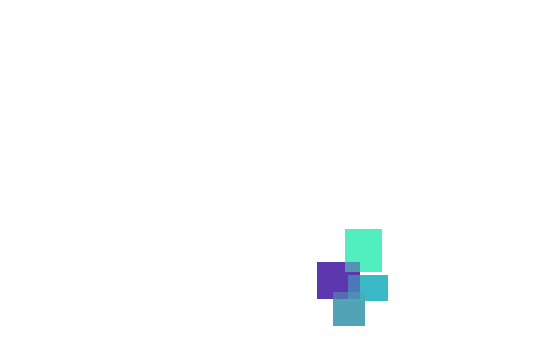

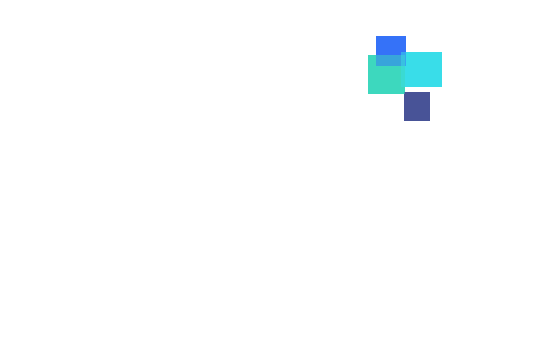

In [11]:
for i in range(3):
    im = Image.new(mode="RGB", size=(1080//2, 720//2), color=(255,255,255))
    random_rectangles_trans_cumulo(im, 4, 720//32, 720//16, ((50,100),(50,255),(150,255)), True, True)
    # random_rectangles_trans_cumulo(im, 10**6, 720//64, 720//32, ((100,150),(160,200),(100,255)), True, True)
    display(im)

In [12]:
def random_rectangles_trans_prop_blanco(imagen, cantidad, lado_min, lado_max, rango_colores, trans, rango_prop_blanco, color_fondo):
    # rango_colores = ((min_r, max_r), (min_g, max_g), (min_b, max_b))
    # rango_prop_blanco = (prop_blanco_min, prop_blanco_max)
    matrix = imagen.load()
    x_max, y_max = imagen.size
    iteracion = 0
    while iteracion < cantidad:
        x_ini, y_ini = random.randint(0,x_max-lado_max), random.randint(0,y_max-lado_max)
        x_lado, y_lado = random.randint(lado_min,lado_max), random.randint(lado_min,lado_max)
        tocando = False
        prop_blanco = 0
        x_ini, y_ini = random.randint(0,x_max-lado_max), random.randint(0,y_max-lado_max)
        x_lado, y_lado = random.randint(lado_min,lado_max), random.randint(lado_min,lado_max)
        tocando = False
        prop_blanco = 0
        for coord_x in range(x_ini, x_ini + x_lado):
            for coord_y in range(y_ini, y_ini + y_lado):
                if matrix[coord_x, coord_y] != color_fondo:
                    tocando = True
                else:
                    prop_blanco += 1
        prop_blanco = prop_blanco/(x_lado*y_lado)
        
        # print(prop_blanco)
                
        if (tocando and prop_blanco >= rango_prop_blanco[0] and prop_blanco <= rango_prop_blanco[1]) or (cantidad == 1):
            color_usado = (random.randint(rango_colores[0][0],rango_colores[0][1]),
            random.randint(rango_colores[1][0],rango_colores[1][1]),
            random.randint(rango_colores[2][0],rango_colores[2][1]))
            for coord_x in range(x_ini, x_ini + x_lado):
                for coord_y in range(y_ini, y_ini + y_lado):
                    if not trans:
                        matrix[coord_x, coord_y] = color_usado
                    else:
                        if matrix[coord_x, coord_y] == color_fondo:
                            matrix[coord_x, coord_y] = color_usado
                        else:
                            matrix[coord_x, coord_y] = (matrix[coord_x, coord_y][0]//2 + color_usado[0]//2,
                                                        matrix[coord_x, coord_y][1]//2 + color_usado[1]//2,
                                                        matrix[coord_x, coord_y][2]//2 + color_usado[2]//2,)
            iteracion += 1
            # print(str(int(round(iteracion/cantidad, 3)*100)) + " %")


In [13]:
def create_collage(images, collage_size):
    collage = Image.new('RGB', collage_size)
    x_offset = 0
    y_offset = 0
    image_count = len(images)
    
    # Calculamos cuántas imágenes pondremos arriba y cuántas abajo
    images_per_row = image_count // 2
    
    # Establecemos el grosor del borde
    border_size = 5  # Ajusta este valor según tu preferencia
    
    for i, img in enumerate(images):
        img.thumbnail((collage_size[0] // images_per_row, collage_size[1] // 2))
        
        # Ajustamos el tamaño de la imagen en función del borde
        img_width, img_height = img.size
        img = img.crop((border_size, border_size, img_width - border_size, img_height - border_size))
        
        img_with_border = ImageOps.expand(img, border=border_size, fill=(250,250,250))  # Agregar bordes
        collage.paste(img_with_border, (x_offset, y_offset))
        x_offset += img_with_border.width
        if i == images_per_row - 1:  # Si ya hemos colocado la primera fila
            x_offset = 0  # Reiniciamos el offset en x
            y_offset = collage.height // 2  # Movemos el offset en y hacia abajo

    display(collage)
    collage.save('collage.jpg')
    

In [14]:
# list_images = []
# color_fondo_ = (244,244,244)
# for i in range(4):
#     im = Image.new(mode="RGB", size=(1080//2, 720//2), color=color_fondo_)
#     random_rectangles_trans_prop_blanco(im, 1, 720//64, 720//32, ((50,100),(100,255),(200,255)), True, (0.1,0.3),color_fondo_)
#     random_rectangles_trans_prop_blanco(im, 200, 720//64, 720//32, ((50,100),(100,255),(200,255)), True, (0.1,0.3),color_fondo_)
#     random_rectangles_trans_prop_blanco(im, 100, 720//64, 720//32, ((100,255),(160,255),(50,100)), True, (0.3,0.6),color_fondo_)
#     random_rectangles_trans_prop_blanco(im, 50, 720//64, 720//32, ((200,255),(160,180),(50,150)), True, (0.6,0.8),color_fondo_)
#     random_rectangles_trans_prop_blanco(im, 70, 720//64, 720//32, ((200,255),(0,180),(0,150)), True, (0.9,0.98),color_fondo_)
#     random_rectangles_trans_prop_blanco(im, 400, 720//64, 720//32, ((200,255),(200,255),(200,255)), True, (0.9,0.98),color_fondo_)
#     list_images.append(im)
# create_collage(list_images, (1080,720))

In [24]:
def random_rectangles_trans_prop_blanco_gusanito(imagen, cantidad, lado_min, lado_max, rango_colores, trans, rango_prop_blanco, color_fondo):
    # rango_colores = ((min_r, max_r), (min_g, max_g), (min_b, max_b))
    # rango_prop_blanco = (prop_blanco_min, prop_blanco_max)
    matrix = imagen.load()
    x_max, y_max = imagen.size
    iteracion = 0
    cuadrado_anterior = (0,0,0,0)
    while iteracion < cantidad:
        x_ini, y_ini = random.randint(0,x_max-lado_max), random.randint(0,y_max-lado_max)
        x_lado, y_lado = random.randint(lado_min,lado_max), random.randint(lado_min,lado_max)
        tocando = False
        prop_blanco = 0
        x_ini, y_ini = random.randint(0,x_max-lado_max), random.randint(0,y_max-lado_max)
        x_lado, y_lado = random.randint(lado_min,lado_max), random.randint(lado_min,lado_max)
        tocando = False
        prop_blanco = 0
        for coord_x in range(x_ini, x_ini + x_lado):
            for coord_y in range(y_ini, y_ini + y_lado):
                if matrix[coord_x, coord_y] != color_fondo:
                    tocando = True
                else:
                    prop_blanco += 1
        prop_blanco = prop_blanco/(x_lado*y_lado)
        
        # print(prop_blanco)
                
        if (tocando and prop_blanco >= rango_prop_blanco[0] and prop_blanco <= rango_prop_blanco[1]) \
            or (cantidad == 1) or (iteracion == 0):
            color_usado = (random.randint(rango_colores[0][0],rango_colores[0][1]),
            random.randint(rango_colores[1][0],rango_colores[1][1]),
            random.randint(rango_colores[2][0],rango_colores[2][1]))
            for coord_x in range(x_ini, x_ini + x_lado):
                for coord_y in range(y_ini, y_ini + y_lado):
                    if (cuadrado_anterior[0] <= coord_x and coord_x <= cuadrado_anterior[0] + cuadrado_anterior[1] and \
                        cuadrado_anterior[2] <= coord_y and coord_y <= cuadrado_anterior[2] + cuadrado_anterior[3]) or (iteracion == 0):
                        if not trans:
                            matrix[coord_x, coord_y] = color_usado
                        else:
                            if matrix[coord_x, coord_y] == color_fondo:
                                matrix[coord_x, coord_y] = color_usado
                            else:
                                matrix[coord_x, coord_y] = (matrix[coord_x, coord_y][0]//2 + color_usado[0]//2,
                                                            matrix[coord_x, coord_y][1]//2 + color_usado[1]//2,
                                                            matrix[coord_x, coord_y][2]//2 + color_usado[2]//2,)
            iteracion += 1
            cuadrado_anterior = (x_ini, x_lado, y_ini, y_lado)
            # print(str(int(round(iteracion/cantidad, 3)*100)) + " %")
            # display(imagen)


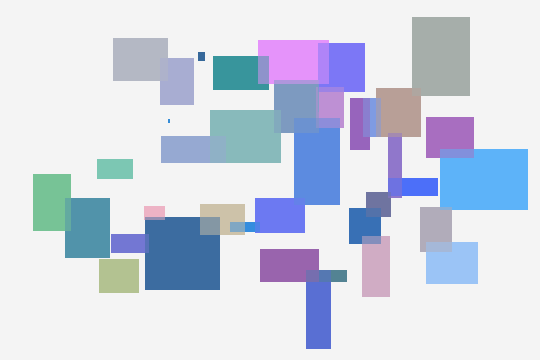

In [20]:
color_fondo_ = (244,244,244)
im = Image.new(mode="RGB", size=(1080//2, 720//2), color=color_fondo_)
random_rectangles_trans_prop_blanco_gusanito(im, 200, 720//32, 720//8, ((50,240),(100,200),(140,255)), True, (0.9,0.95),color_fondo_)
display(im)

In [17]:
# for j in range(1):
#     list_images = []
#     color_fondo_ = (254,220,230)
#     for i in [(10,4),(20,6),(80,8),(200,10)]:
#         print(i)
#         im = Image.new(mode="RGB", size=(1080//2, 720//2), color=color_fondo_)
#         random_rectangles_trans_prop_blanco_gusanito(im, i[0], 720//i[1], 720//i[1], ((160,255),(110,140),(100,210)), True, (0.7,0.8),color_fondo_)
#         list_images.append(im)
#     create_collage(list_images, (1080,720))

(10, 4)


(30, 6)
(80, 8)
(250, 12)


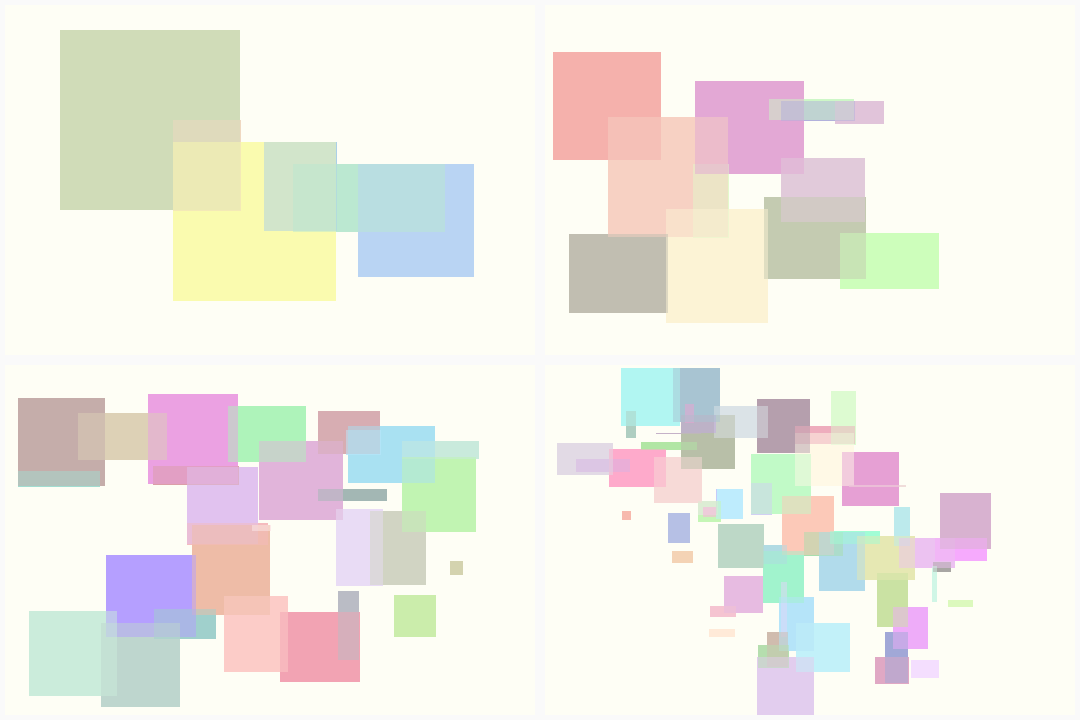

In [18]:
for j in range(1):
    list_images = []
    color_fondo_ = (254,254,245)
    for i in [(10,4),(30,6),(80,8),(250,12)]:
        print(i)
        im = Image.new(mode="RGB", size=(1080//2, 720//2), color=color_fondo_)
        random_rectangles_trans_prop_blanco_gusanito(im, i[0], 720//i[1], 720//i[1], ((159,255),(159,255),(159,255)), True, (0.8,0.85),color_fondo_)
        list_images.append(im)
    create_collage(list_images, (1080,720))

0
1
2
3


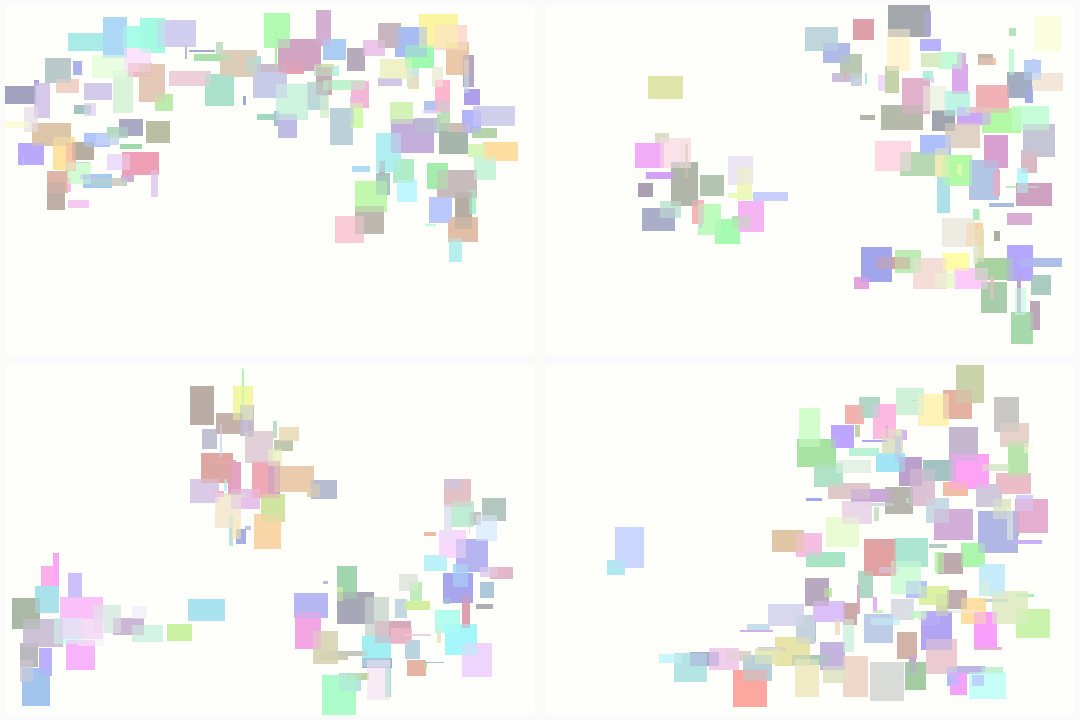

In [30]:
for j in range(1):
    list_images = []
    color_fondo_ = (254,254,250)
    for i in range(4):
        print(i)
        im = Image.new(mode="RGB", size=(1080//2, 720//2), color=color_fondo_)
        random_rectangles_trans_prop_blanco_gusanito(im, 10, 720//32, 720//16, ((159,255),(159,255),(159,255)), True, (0.8,0.85),color_fondo_)
        random_rectangles_trans_prop_blanco_gusanito(im, 20, 720//32, 720//16, ((159,255),(159,255),(159,255)), True, (0.8,0.85),color_fondo_)
        random_rectangles_trans_prop_blanco_gusanito(im, 30, 720//32, 720//16, ((159,255),(159,255),(159,255)), True, (0.8,0.85),color_fondo_)
        random_rectangles_trans_prop_blanco_gusanito(im, 500, 720//32, 720//16, ((159,255),(159,255),(159,255)), True, (0.8,0.85),color_fondo_)
        random_rectangles_trans_prop_blanco_gusanito(im, 800, 720//32, 720//16, ((159,255),(159,255),(159,255)), True, (0.8,0.85),color_fondo_)
        random_rectangles_trans_prop_blanco_gusanito(im, 100, 720//32, 720//16, ((159,255),(159,255),(159,255)), True, (0.8,0.85),color_fondo_)
        random_rectangles_trans_prop_blanco_gusanito(im, 110, 720//32, 720//16, ((159,255),(159,255),(159,255)), True, (0.8,0.85),color_fondo_)
        list_images.append(im)
    create_collage(list_images, (1080,720))